1. Import Libraries and Load Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2. Inspect and Clean Data

In [16]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns (if any)
df.dropna(subset=['date_added'], inplace=True)

# Remove leading and trailing spaces in 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


3. EDA: Movies vs. TV Shows

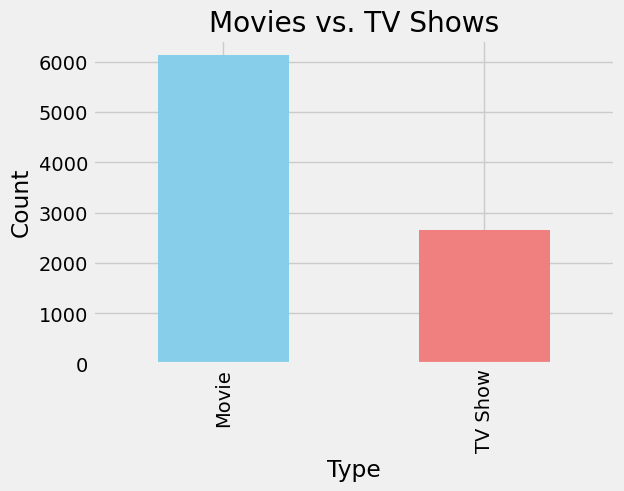

In [26]:
# Count movies vs. TV shows
type_counts = df['type'].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Most Netflix content consists of movies.

4. EDA: Trends Over Time

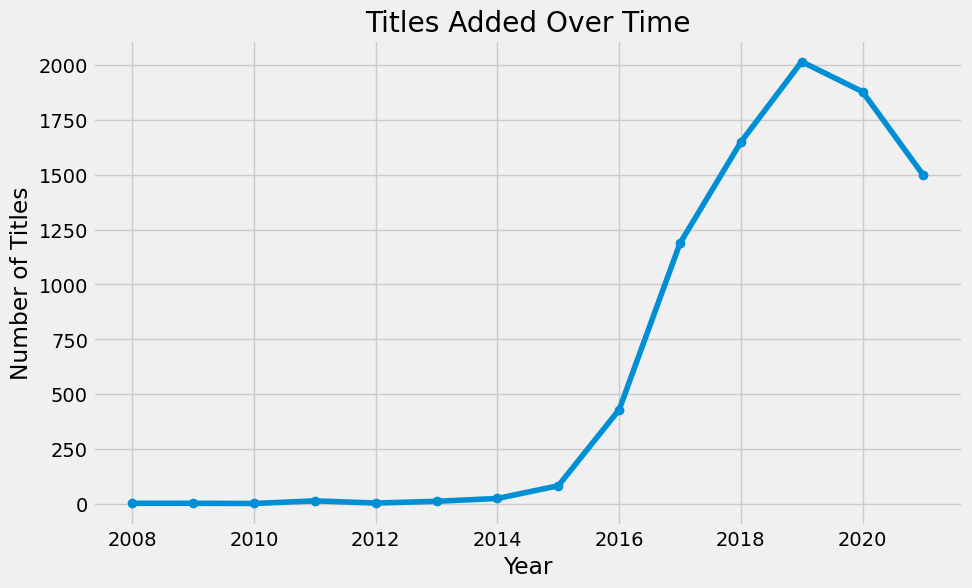

In [29]:
# Add a year column
df['year_added'] = df['date_added'].dt.year

# Count titles by year
titles_per_year = df['year_added'].value_counts().sort_index()

# Line plot
plt.figure(figsize=(10,6))
titles_per_year.plot(kind='line', marker='o')
plt.title('Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Netflix started adding a significantly higher number of titles after 2015.

5. EDA: Genre Analysis

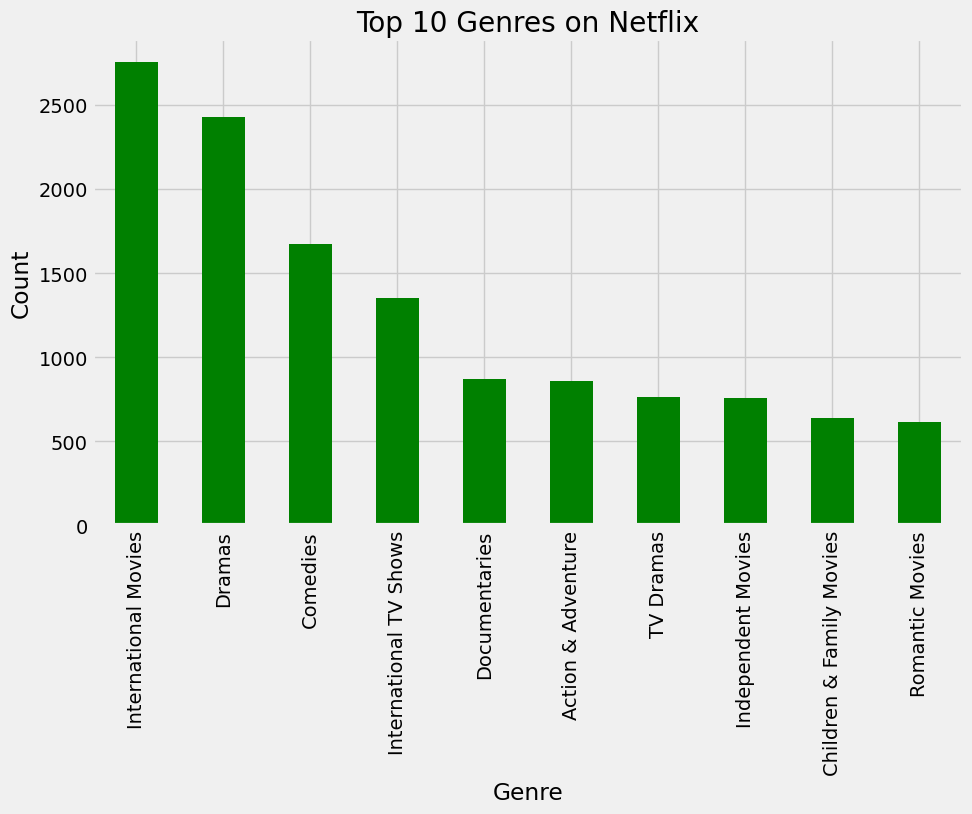

In [34]:
# Extract genres (from 'listed_in' column)
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])

# Bar chart of top genres
top_genres = pd.Series(genre_counts).sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='green')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The most common genres are Drama and Comedy.

6. EDA: Country Analysis

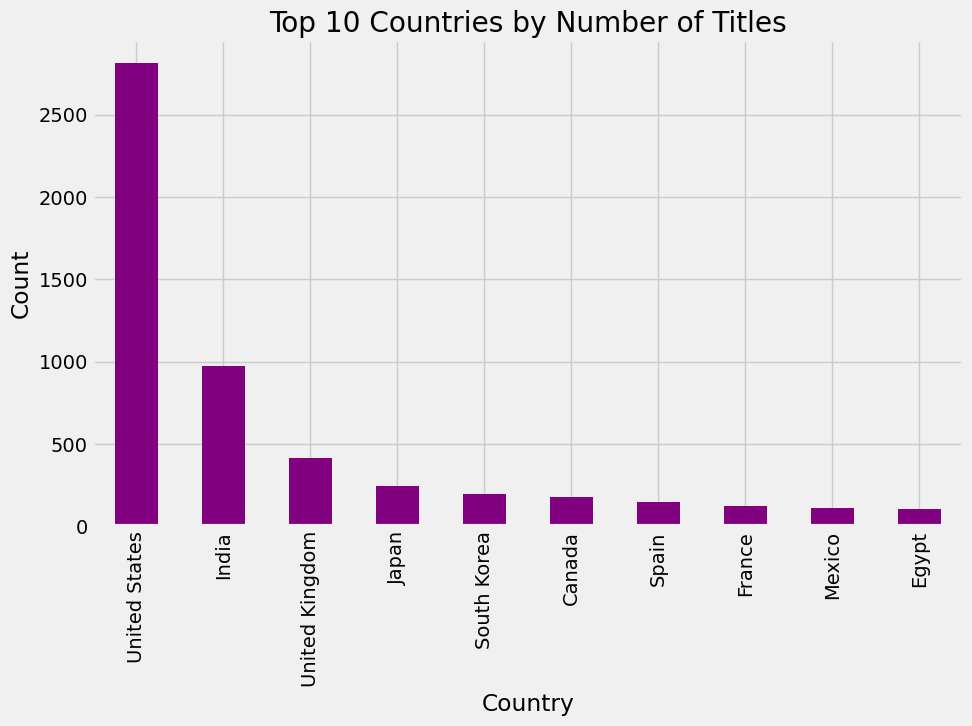

In [37]:
# Extract and count content by country
top_countries = df['country'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()